In [1]:
GPT2_VERSION = 'gpt2-medium'
FILTER = 'unfiltered'
SPLIT = 'dev'

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_{GPT2_VERSION}_{FILTER}_{SPLIT}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 160
Mean total effect: 0.474

INDIRECT Effect (mean = 0.0009842910809663157)
Top 10 heads:
   10 9: 0.064 (p=0.0000)
   6 15: 0.063 (p=0.0000)
   10 12: 0.040 (p=0.0000)
   12 14: 0.037 (p=0.0000)
   9 14: 0.027 (p=0.0000)
   11 6: 0.017 (p=0.0000)
   9 3: 0.016 (p=0.0000)
   6 10: 0.014 (p=0.0000)
   12 0: 0.014 (p=0.0000)
   9 8: 0.012 (p=0.0000)

DIRECT Effect (mean = 0.47241278452793456)
Top 10 heads:
   10 9: 0.381 (p=0.1131)
   12 14: 0.399 (p=0.1679)
   6 15: 0.400 (p=0.1710)
   10 12: 0.401 (p=0.1722)
   11 6: 0.435 (p=0.3131)
   12 0: 0.445 (p=0.3589)
   9 14: 0.453 (p=0.3971)
   14 13: 0.454 (p=0.4053)
   6 10: 0.454 (p=0.4054)
   10 13: 0.456 (p=0.4125)


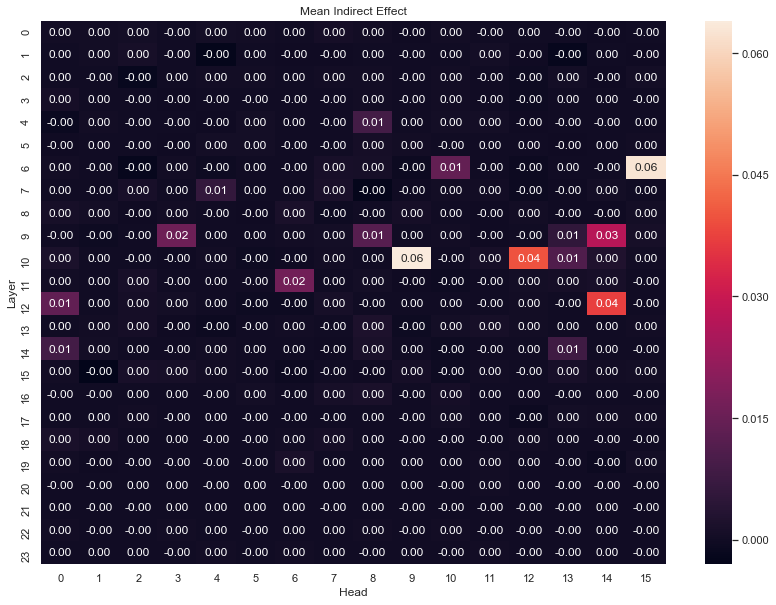

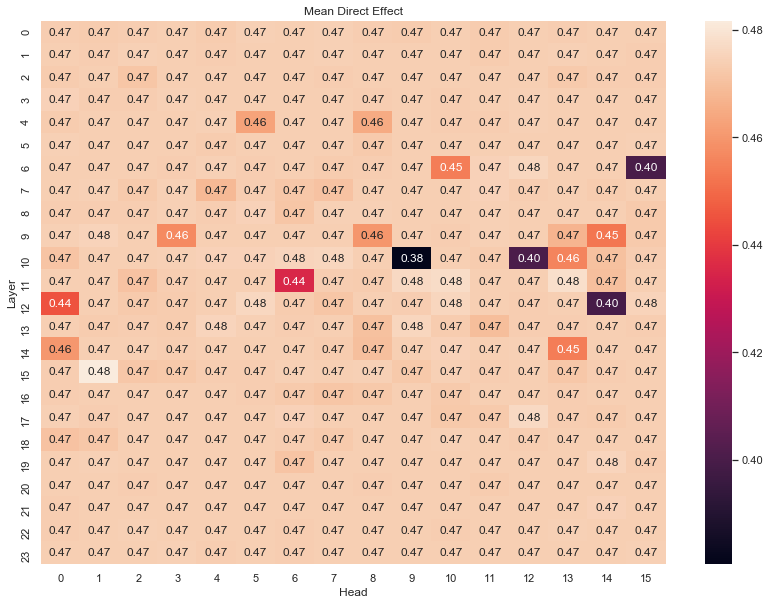

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 160
Mean total effect: 0.474


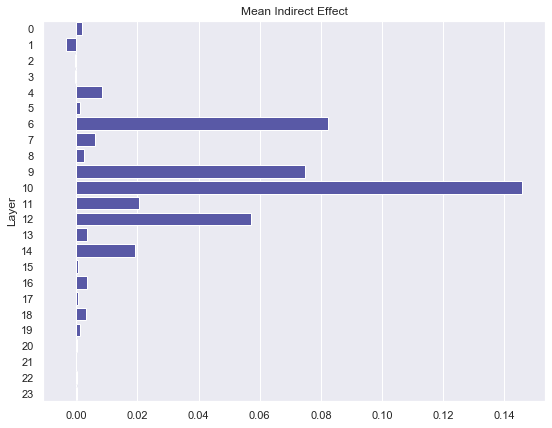

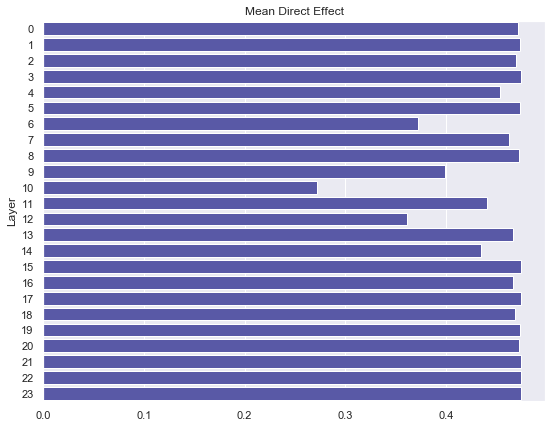

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 0.77911
p(c2|x') / p(c1|x') = 2.54699

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 2.269


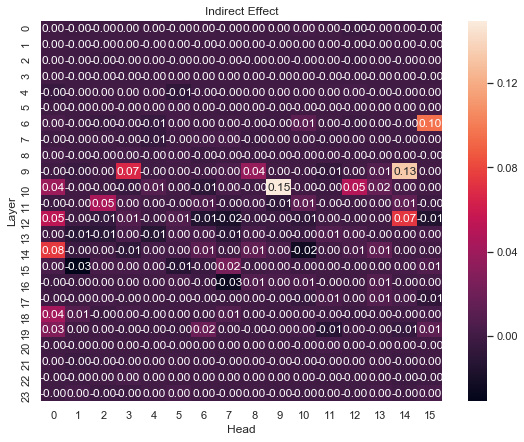

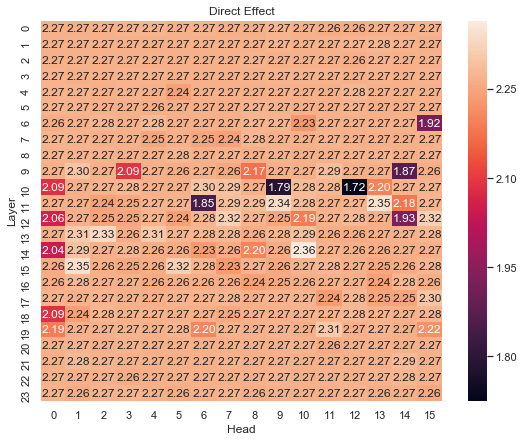

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.25557
p(c2|x') / p(c1|x') = 0.30915

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.210


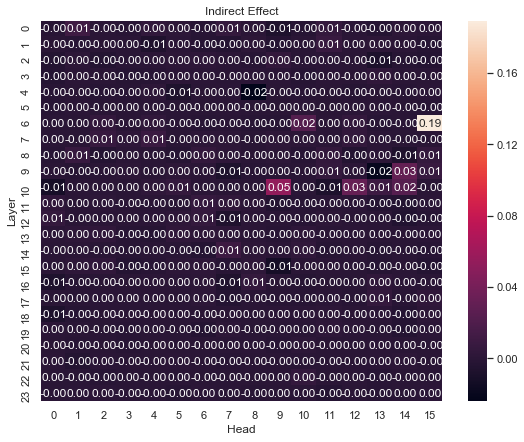

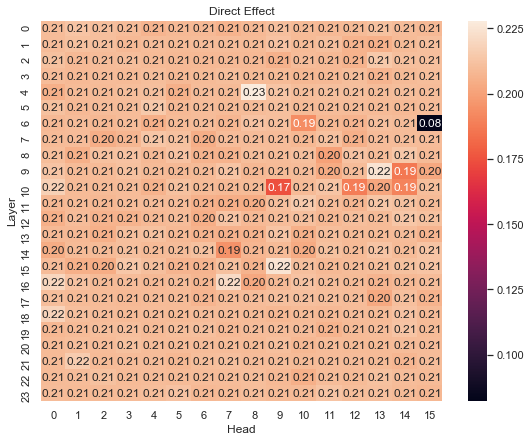

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.29167
p(c2|x') / p(c1|x') = 1.05049

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 2.602


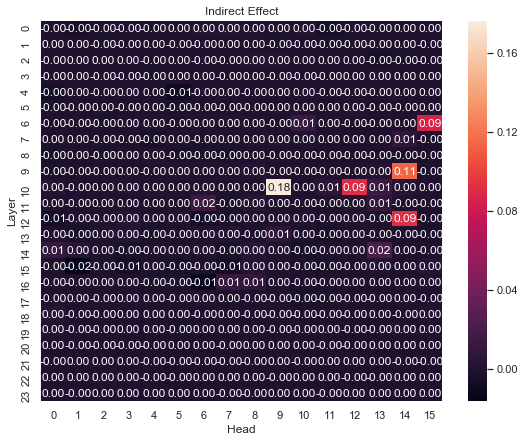

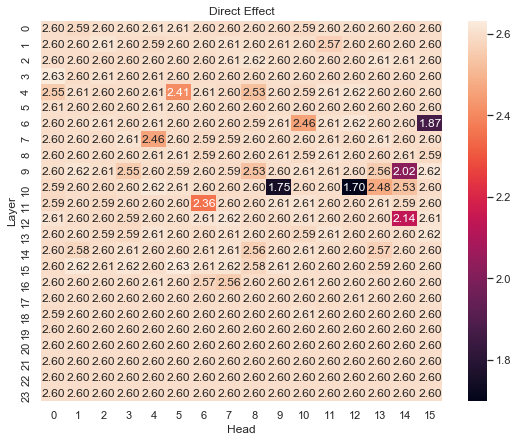

In [8]:
report_intervention(results[2])

x : The lawyer yelled at the hairdresser because she
x': The lawyer yelled at the hairdresser because he
c1: did a bad job .
c2: was mad .

p(c2|x) / p(c1|x) = 0.24297
p(c2|x') / p(c1|x') = 0.22642

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.068


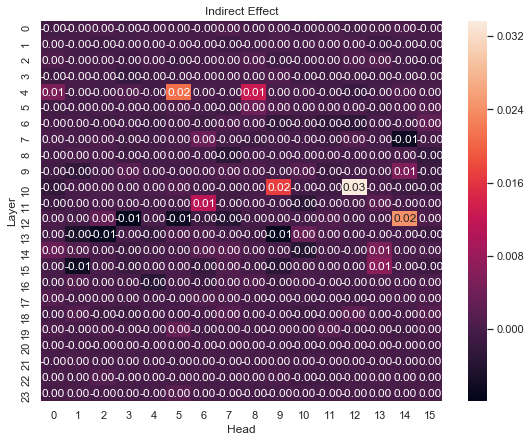

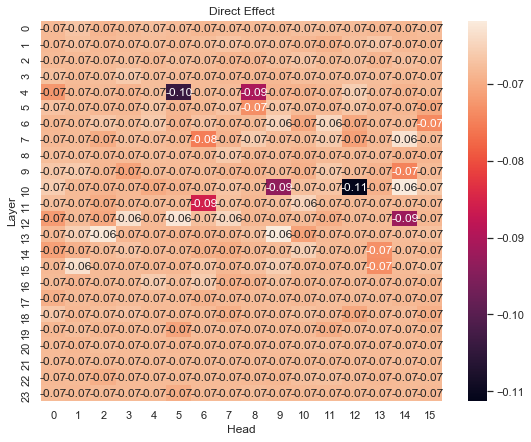

In [9]:
report_intervention(results[3])
